In [1]:
from astropy.table import Table
from astropy.timeseries import TimeSeries
from astropy import units as u

from matplotlib import pyplot
import seaborn

from pathlib import Path

from targets import TARGETS

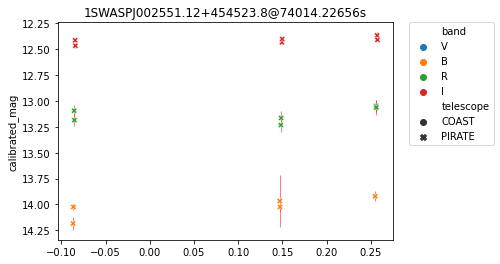

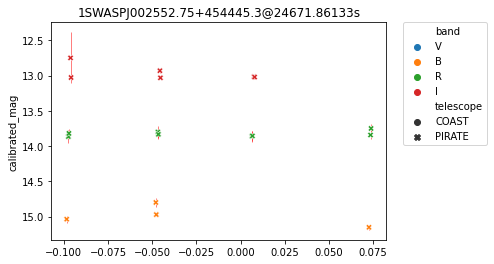

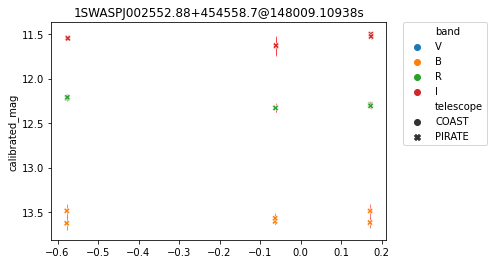

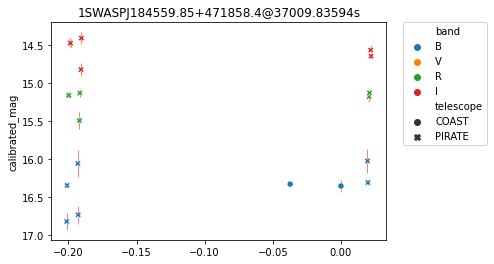

In [2]:
for table in Path('data').glob('*.ecsv'):
    target_config = TARGETS[table.stem]
    if 'expected_periods' not in target_config:
        continue
    timeseries = TimeSeries.read(table, time_column='timestamp', time_format='jd')
    timeseries = timeseries[timeseries['FLAGS'] == 0]
    for period in target_config['expected_periods']:
        folded = timeseries.fold(period=period * u.second)
    
        fig = pyplot.figure()
        mag = seaborn.scatterplot(
            x=folded.time.jd,
            y=folded['calibrated_mag'],
            hue=timeseries['band'],
            style=timeseries['telescope'],
        )
        pyplot.errorbar(
            folded.time.jd,
            folded['calibrated_mag'],
            yerr=folded['calibrated_mag_err'],
            ecolor='red',
            ls='none',
            zorder=-1,
            alpha=0.5,
            elinewidth=1,
        )
        mag.invert_yaxis()
        mag.set(title=f'{table.stem}@{period}s')
        pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        pyplot.show()